# SEEK Company Reviews

In this project, we explore different Natural Language Processing techniques and introduce a couple of ideas and approaches as to how we can extract useful insights from text data.

The data we are working with are [SEEK company reviews](https://www.seek.com.au/companies/browse-reviews) for the most popular employers in Australia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataframe
df = pd.read_csv("datasets/seek_company_reviews.csv")

In [3]:
df.shape

(2672, 11)

In [4]:
df.head()

,company,link,num_ratings,num_stars,titles_combined,pros_combined,cons_combined,roles_combined,dates_combined,additional_combined,individual_stars_combined
0,McDonald's,https://www.seek.com.au/companies/mcdonalds-43...,3470,3.3719,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Apr 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">3.0</span>..."
1,Coles Supermarkets,https://www.seek.com.au/companies/coles-superm...,2950,3.2505,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Mar 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">4.0</span>..."
2,Woolworths Supermarkets,https://www.seek.com.au/companies/woolworths-s...,2737,3.2965,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Mar 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">1.0</span>..."
3,Commonwealth Bank of Australia,https://www.seek.com.au/companies/commonwealth...,1366,3.4996,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Apr 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">1.0</span>..."
4,KFC,https://www.seek.com.au/companies/kfc-432299,1232,3.3888,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Apr 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">1.0</span>..."


We have a lot of cleaning and information extracting to do!

Let's start by taking a closer look at our `titles_combined` column:

In [5]:
df.loc[0, "titles_combined"]

'[<h3 class="qRfda7HHzbPlBhTkYnbH"><a href="/companies/mcdonalds-432296/reviews/164887779841917">it was an amazing experience</a></h3>, <h3 class="qRfda7HHzbPlBhTkYnbH"><a href="/companies/mcdonalds-432296/reviews/164863725541775">great learning experience as a first job and stepping into management if wanted too</a></h3>, <h3 class="qRfda7HHzbPlBhTkYnbH"><a href="/companies/mcdonalds-432296/reviews/164860154871591">was difficult at the start but as the days go by you soon start to pick it up and it becomes natural.</a></h3>, <h3 class="qRfda7HHzbPlBhTkYnbH"><a href="/companies/mcdonalds-432296/reviews/164837194228320">Like a box of chocolates.</a></h3>, <h3 class="qRfda7HHzbPlBhTkYnbH"><a href="/companies/mcdonalds-432296/reviews/164833228580631">it was great learning</a></h3>, <h3 class="qRfda7HHzbPlBhTkYnbH"><a href="/companies/mcdonalds-432296/reviews/164670840576322">Horrible, would not recommend unless you are desperate</a></h3>, <h3 class="qRfda7HHzbPlBhTkYnbH"><a href="/compani

`str.extract()` only extracts the first result found in a given string. To extract **all** matches, we need to use `str.extractall()`. `str.extractall()` returns a multi-index dataframe, which means we have to perform cleaning before we can store the results as a column in `df`.

In [6]:
# removing "\n" from all combined columns to ensure str.extractall() doesn't miss any results
cols = ["titles_combined", "pros_combined", "cons_combined", "roles_combined", 
        "dates_combined", "additional_combined", "individual_stars_combined"]

for col in cols:
    df[col] = df[col].str.replace("\n", "")

In [7]:
# str.extractall()
extract_all = df["titles_combined"].str.extractall('reviews/\d+">(.*?)</a>')
extract_all.reset_index(inplace=True)
extract_all.columns = ["index", "match", "titles"]
extract_all

,index,match,titles
0,0,0,it was an amazing experience
1,0,1,great learning experience as a first job and s...
2,0,2,was difficult at the start but as the days go ...
3,0,3,Like a box of chocolates.
4,0,4,it was great learning
...,...,...,...
52367,2671,12,9 years of service and i still love coming to ...
52368,2671,13,Great company to work for - family environment.
52369,2671,14,The best company i have ever worked for.
52370,2671,15,Great company to work for with an amazing team...


Let's add `". // "` to the end of each title 
-  "." to allow us to perform sentence analysis later (a lot of the reviews do not include punctuation)
-  "//" to clearly separate individual reviews from each other (so we know where a title starts and ends - a single title could consist of multiple sentences)

In [8]:
# adding ". // " to the end of each title
extract_all["titles"] = extract_all["titles"] + ". // "

In [9]:
# cleaning
extract_all["titles"] = extract_all["titles"].str.replace("\. \.", ".")
extract_all["titles"] = extract_all["titles"].str.replace("\.\.", ".")
extract_all["titles"] = extract_all["titles"].str.replace(" \.", ".")
extract_all["titles"] = extract_all["titles"].str.replace("&amp;", "&")

In [10]:
# group by index
grouped = extract_all.groupby("index")[["titles"]]
grouped_sum = grouped.agg(np.sum)
grouped_sum.reset_index(inplace=True)
grouped_sum

,index,titles
0,0,it was an amazing experience. // great learnin...
1,1,A well organized company good people to work w...
2,2,Never again. // Well operated company that you...
3,3,Toxic and avoid if possible. // I love working...
4,4,Unfortunately to the Company your just a numbe...
...,...,...
2667,2667,"Good people, never out of work during COVID an..."
2668,2668,Really enjoy working at Swan plenty of opportu...
2669,2669,my most rewarding job yet. // Wish had a good ...
2670,2670,Would not recommend as either a workplace or a...


In [11]:
grouped_sum.loc[0, "titles"]

"it was an amazing experience. // great learning experience as a first job and stepping into management if wanted too. // was difficult at the start but as the days go by you soon start to pick it up and it becomes natural. // Like a box of chocolates. // it was great learning. // Horrible, would not recommend unless you are desperate. // enjoyable and can be stressful at times. // very good for a beginner job. // You can build a career in the restaurant industry. // Poor environment. // it is a very great first real job and opens a lot of doors in the future. // overall great place to work but could be improved a bit. // had its ups and downs but overall pretty good. // New experiences, personal growth, and achievement. // Extremely stressful and nightmare inducing but worth it. // This job helped me grow and taught me the importance of customer service skills and being part of a team. // Needs serious attention. // it's a good first job. // Good as a first job, but not more than that

In [12]:
# add the "title" column in grouped_sum to our main dataframe df
df["titles"] = grouped_sum["titles"]

In [13]:
df.sample(3)

,company,link,num_ratings,num_stars,titles_combined,pros_combined,cons_combined,roles_combined,dates_combined,additional_combined,individual_stars_combined,titles
571,Skycity Entertainment Group,https://www.seek.com.au/companies/skycity-ente...,81,3.7160,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Mar 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">2.0</span>...","Poor management, unsupportive team, unfriendly..."
1910,Avanade,https://www.seek.com.au/companies/avanade-434613,28,3.2143,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Mar 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">5.0</span>...",You remember the people who care and you want...
1993,Custom Fleet,https://www.seek.com.au/companies/custom-fleet...,27,2.7407,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Jul 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">2.0</span>...","Nowhere. . // Great culture, family feel, fast..."


Fantastic! Let's write a function to help us clean the "extractall" dataframes for the other columns in `df`that we will need to process.

In [14]:
def extract_all_cleaning(extract_all_df, name, dataframe):
    
    # reset index and name columns
    extract_all_df.reset_index(inplace=True)
    extract_all_df.columns = ["index", "match", "results"]
    
    # separate results with ". // " 
    extract_all_df["results"] = extract_all_df["results"] + ". // "
    
    # perform some cleaning
    extract_all_df["results"] = extract_all_df["results"].str.replace("\. \.", ".").str.replace("\.\.", ".").str.replace(" \.", ".")
    extract_all_df["results"] = extract_all_df["results"].str.replace("&amp;", "&")
    
    # deal with any possible null values
    extract_all_df["results"] = extract_all_df["results"].fillna("Unknown")
    
    # group by index
    grouped = extract_all_df.groupby("index")[["results"]]
    grouped_sum = grouped.agg(np.sum)
    grouped_sum.reset_index(inplace=True)
    
    # add "results" column to dataframe
    dataframe[name] = grouped_sum["results"]

In [15]:
# quick test
extract_all_titles = df["titles_combined"].str.extractall('reviews/\d+">(.*?)</a>')
extract_all_cleaning(extract_all_titles, "titles_2", df)

In [16]:
df.sample(3)

,company,link,num_ratings,num_stars,titles_combined,pros_combined,cons_combined,roles_combined,dates_combined,additional_combined,individual_stars_combined,titles,titles_2
71,Aurizon,https://www.seek.com.au/companies/aurizon-432518,314,3.0319,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Nov 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">2.0</span>...",Not an ideal place for long term. // Nice pay....,Not an ideal place for long term. // Nice pay....
578,iSelect,https://www.seek.com.au/companies/iselect-433622,80,2.8625,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Nov 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">4.0</span>...",I'm grateful financially for what iSelect has ...,I'm grateful financially for what iSelect has ...
1113,ActewAGL,https://www.seek.com.au/companies/actewagl-433661,49,3.1429,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Nov 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">5.0</span>...","Local, hard-working team with never ending opp...","Local, hard-working team with never ending opp..."


In [17]:
# dropping titles_2 column
df = df.drop(["titles_2"], axis=1)

Great! Now let's create our extract_all dataframes for the remaining columns to be processed.

In [18]:
extract_all_pros = df["pros_combined"].str.extractall('<div>(.*?)</div>')
extract_all_cons = df["cons_combined"].str.extractall('<div>(.*?)</div>')
extract_all_roles = df["roles_combined"].str.extractall('Him">(.*?)</p>')
extract_all_dates = df["dates_combined"].str.extractall('<span>(.*?)</span>')
extract_all_add_location = df["additional_combined"].str.extractall('"work-location">(.*?)</div>')
extract_all_individual_stars = df["individual_stars_combined"].str.extractall('">(.*?)</span>')

In [19]:
name_list = ["pros", "cons", "roles", "dates", "location", "individual_stars"]
i = 0

for extract_all in [extract_all_pros, extract_all_cons, extract_all_roles, extract_all_dates, 
                    extract_all_add_location, extract_all_individual_stars]:
    name = name_list[i]
    extract_all_cleaning(extract_all, name, df)
    i = i + 1

In [20]:
df.sample(3)

,company,link,num_ratings,num_stars,titles_combined,pros_combined,cons_combined,roles_combined,dates_combined,additional_combined,individual_stars_combined,titles,pros,cons,roles,dates,location,individual_stars
1964,OTIS Elevator Company,https://www.seek.com.au/companies/otis-elevato...,28,3.7500,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Dec 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">5.0</span>...",Wouldn’t work for another lift company. // Lea...,"My colleagues, mechanics & management. // Made...",speed of adaption to market pressures. // Terr...,Manager. // Administration Officer. // Sales R...,Dec 2021. // Mar 2020. // Mar 2020. // Mar 202...,"New South Wales, Australia. // Sydney NSW, Aus...",5.0. // 1.0. // 4.0. // 5.0. // 4.0. // 5.0. /...
2029,Complete Office Supplies,https://www.seek.com.au/companies/complete-off...,27,3.4074,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>May 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">5.0</span>...",No frills workplace with characters. // Genera...,"All of the crew in Brisbane before covid, fun ...",Delivering pallet load of copy paper to multi-...,Driver. // Sales Role. // Receiving team. // S...,May 2020. // Mar 2020. // Mar 2020. // Mar 202...,"Queensland, Australia. // Australia. // Acacia...",5.0. // 3.0. // 4.0. // 5.0. // 2.0. // 3.0. /...
1243,Minara Resources,https://www.seek.com.au/companies/minara-resou...,44,3.5909,"[<h3 class=""qRfda7HHzbPlBhTkYnbH""><a href=""/co...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""good-re...","[<div class=""z8eGwsfhqIE256nC61oL"" id=""challan...","[<div class=""ysYBhN_Vjh5RHz9Kfy14""><p class=""J...","[<p class=""_1aC9PpfEjEMZrSpAowz""><span>Mar 202...","[<div class=""VCin_G2mqaxsRQi8aVF6""><div id=""wo...","[<span class=""u5773R2dAcGFOGKosyl2"">5.0</span>...",Paid for two houses for me. // If your an offi...,It’s always a challenge. Plenty of internal pr...,Trying to get things done quickly in a bureauc...,Process Operator. // Process Operator. // Prod...,Mar 2020. // Mar 2020. // Dec 2019. // Nov 201...,"Laverton WA, Australia. // Perth WA, Australia...",5.0. // 1.0. // 3.0. // 2.0. // 5.0. // 5.0. /...


In [21]:
# dropping scraped columns
df = df.drop(["titles_combined", "pros_combined", "cons_combined", "roles_combined", "dates_combined", 
              "additional_combined", "individual_stars_combined"], axis=1)

In [22]:
# adding length of results per company for each column
for i in range(0, len(df)):
    df.loc[i, "titles_length"] = len(df.loc[i, "titles"].split("//")) - 1
    df.loc[i, "pros_length"] = len(df.loc[i, "pros"].split("//")) - 1
    df.loc[i, "cons_length"] = len(df.loc[i, "cons"].split("//")) - 1
    df.loc[i, "roles_length"] = len(df.loc[i, "roles"].split("//")) - 1
    df.loc[i, "dates_length"] = len(df.loc[i, "dates"].split("//")) - 1
    df.loc[i, "locations_length"] = len(df.loc[i, "location"].split("//")) - 1
    df.loc[i, "individual_stars_length"] = len(df.loc[i, "individual_stars"].split("//")) - 1

In [23]:
df.sample(3)

,company,link,num_ratings,num_stars,titles,pros,cons,roles,dates,location,individual_stars,titles_length,pros_length,cons_length,roles_length,dates_length,locations_length,individual_stars_length
2275,Summerland Credit Union,https://www.seek.com.au/companies/summerland-c...,24,3.7083,Experienced operators who have the confidence ...,Treated as an equal. My experience is recogniz...,Getting the brand name recognized in the Clare...,Lending Specialist. // Banking Advisor. // Pay...,Feb 2022. // Nov 2021. // Jul 2021. // Apr 202...,"New South Wales, Australia. // New South Wales...",4.0. // 5.0. // 5.0. // 5.0. // 1.0. // 5.0. /...,20.0,20.0,20.0,20.0,20.0,20.0,20.0
31,UGL,https://www.seek.com.au/companies/ugl-432388,573,3.6510,"Very poor , good local Team let down by the Se...","Well paid role , the money was what I expected...",Very poor senior management with very little i...,Contract Support. // Worker. // Mobile Maintai...,Mar 2022. // Sep 2021. // Sep 2021. // Apr 202...,"Queensland, Australia. // New South Wales, Aus...",1.0. // 2.0. // 4.0. // 1.0. // 1.0. // 5.0. /...,20.0,20.0,20.0,20.0,20.0,20.0,20.0
795,Pilbara Access,https://www.seek.com.au/companies/pilbara-acce...,64,2.6875,Woeful organisation. // Poor management. // An...,Not much pay was always paid. // Met a good bu...,Heat shift work dynamic work and people. // Co...,Ropey. // Scaffolder. // Leading Hand. // Scaf...,Mar 2020. // Mar 2020. // Mar 2020. // Nov 201...,"Western Australia, Australia. // Western Austr...",1.0. // 1.0. // 2.0. // 1.0. // 2.0. // 4.0. /...,20.0,20.0,20.0,20.0,20.0,20.0,20.0


#### Cleaning

In [24]:
import contractions
import string

In [25]:
# punctuation to remove - we will keep "/" for now
punct_to_remove = string.punctuation.replace("/", "")
punct_to_remove

'!"#$%&\'()*+,-.:;<=>?@[\\]^_`{|}~'

In [26]:
def remove_punct(text):
    for char in punct_to_remove:
        text = text.replace(char, "")
    return text

In [27]:
from nltk.corpus import stopwords
stops = stopwords.words("english")
stops.remove("not") # remove the word "not" from our stopwords

In [28]:
# keep a copy of original columns
df["og_titles"] = df["titles"]
df["og_pros"] = df["pros"]
df["og_cons"] = df["cons"]

In [29]:
# start cleaning
columns = ["titles", "pros", "cons"]

for col in columns:
    df[f"cleaned_{col}"] = df[col].str.lower()
    df[f"cleaned_{col}"] = df[f"cleaned_{col}"].apply(lambda x: contractions.fix(x))
    
    df[f"cleaned_{col}"] = df[f"cleaned_{col}"].apply(remove_punct)
    df[f"cleaned_{col}"] = df[f"cleaned_{col}"].apply(lambda x: " ".join([word for word in x.split() if word not in stops]))

In [30]:
# dropping titles, pros and cons columns
df = df.drop(["titles", "pros", "cons"], axis=1)

In [31]:
# changing column order for readability
df = df[["company", "link", "num_ratings", "num_stars", "roles", "dates", "location", "individual_stars", 
         "og_titles", "cleaned_titles", "og_pros", "cleaned_pros", "og_cons", "cleaned_cons", "titles_length", 
         "pros_length", "cons_length", "roles_length", "dates_length", "locations_length", "individual_stars_length"]]

In [32]:
df.sample(3)

,company,link,num_ratings,num_stars,roles,dates,location,individual_stars,og_titles,cleaned_titles,...,cleaned_pros,og_cons,cleaned_cons,titles_length,pros_length,cons_length,roles_length,dates_length,locations_length,individual_stars_length
2487,Nexgen,https://www.seek.com.au/companies/nexgen-831091,21,4.1905,Field Service Technician. // Employee. // Sale...,Nov 2019. // Oct 2019. // Oct 2019. // Oct 201...,"Parramatta NSW, Australia. // Parramatta NSW, ...",1.0. // 5.0. // 5.0. // 5.0. // 5.0. // 4.0. /...,"Money hungry, everyone is replaceable. // Lovi...",money hungry everyone replaceable // loving //...,...,looked terms tools ppe // great people support...,"Lack of professionalism. // To be honest, no c...",lack professionalism // honest challenges // n...,20.0,20.0,20.0,20.0,20.0,20.0,20.0
713,Autobarn,https://www.seek.com.au/companies/autobarn-433151,69,3.1014,Sales Assistant. // Sales Consultant. // Insta...,Apr 2022. // Sep 2020. // May 2020. // Mar 202...,"Western Australia, Australia. // New South Wal...",2.0. // 4.0. // 1.0. // 1.0. // 1.0. // 5.0. /...,Low pay and understaffed. // great but frantic...,low pay understaffed // great frantic // dissa...,...,team member discounts development // great fri...,Understaffed constantly. // constant chasing y...,understaffed constantly // constant chasing ta...,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2230,On The Line Australia,https://www.seek.com.au/companies/on-the-line-...,24,2.6250,Counsellor. // Manager. // Finance Business Ma...,Feb 2022. // Apr 2021. // Apr 2021. // Jan 202...,"Victoria, Australia. // Victoria, Australia. /...",1.0. // 4.0. // 5.0. // 1.0. // 1.0. // 5.0. /...,An unpleasant place to work. // Hardworking or...,unpleasant place work // hardworking organisat...,...,could used stepping stone better job // divers...,Toxic workplace where HR are part of the probl...,toxic workplace hr part problem chronically un...,20.0,20.0,20.0,20.0,20.0,20.0,20.0


#### Top Words

In [33]:
def find_top_words(dataframe, col, num):
    top_words = pd.Series(" ".join(dataframe[col]).split()).value_counts()[:num]
    return top_words

top words in titles

In [34]:
# removing additional punctuation and stop words from cleaned_titles and storing the results in a new column
stop = ["//", "work", "working", "worked", "not", "place", "company", "job", "would", "time", "ever", "never", "life"]
df["titles_no_punct"] = df["cleaned_titles"].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))

In [35]:
titles_top_20 = find_top_words(df, "titles_no_punct", 20)
titles_top_20

great            9713
good             7203
experience       4367
management       3852
people           3369
environment      2508
team             2111
career           2055
best             1854
staff            1773
culture          1436
recommend        1378
years            1271
poor             1217
challenging      1217
opportunity      1154
opportunities    1127
overall          1121
love             1115
bad              1108
dtype: int64

top words in titles for specific companies

In [36]:
qic = df[df["company"] == "QIC"]
qic_top_8 = find_top_words(qic, "titles_no_punct", 8)
qic_top_8

great          11
culture         3
overall         2
care            2
environment     2
management      2
happy           2
staff           2
dtype: int64

In [37]:
jbc = df[df["company"] == "Just better care"]
jbc_top_8 = find_top_words(jbc, "titles_no_punct", 8)
jbc_top_8

experience    3
good          2
run           2
enjoyed       2
go            2
car           2
wonderful     2
better        2
dtype: int64

In [38]:
# drop column titles_no_punct again
df = df.drop(["titles_no_punct"], axis=1)

top words for titles, pros and cons

In [39]:
top_word_titles_list = []
top_word_pros_list = []
top_word_cons_list = []

for company in df["company"]:
    
    company_df = df[df["company"] == company].copy()
    
    # creating a new stopword list to remove "//", "not" and other less useful words from our columns in company_df
    stops = ["//", "work", "working", "worked", "not", "place", "company", "job", "would", "time", "ever", "never", "life"]
    for col in ["cleaned_titles", "cleaned_pros", "cleaned_cons"]: 
        company_df[col] = company_df[col].apply(lambda x: " ".join([word for word in x.split() if word not in stops]))
    
    top_word_titles = find_top_words(company_df, "cleaned_titles", 1)
    top_word_pros = find_top_words(company_df, "cleaned_pros", 1)
    top_word_cons = find_top_words(company_df, "cleaned_cons", 1)
    
    # only append top_word if the count is greater than 1, else append "none"
    
    if top_word_titles[0] > 1:
        top_word_titles_list.append(top_word_titles.index[0])
    else:
        top_word_titles_list.append("none")
        
    if top_word_pros[0] > 1:
        top_word_pros_list.append(top_word_pros.index[0])
    else:
        top_word_pros_list.append("none")
        
    if top_word_cons[0] > 1:
        top_word_cons_list.append(top_word_cons.index[0])
    else:
        top_word_cons_list.append("none")

In [40]:
df["top_words_titles"] = top_word_titles_list
df["top_words_pros"] = top_word_pros_list
df["top_words_cons"] = top_word_cons_list

In [41]:
print(df["top_words_titles"].nunique(), df["top_words_pros"].nunique(), df["top_words_cons"].nunique())

265 139 211


In [42]:
df.sample(3)

,company,link,num_ratings,num_stars,roles,dates,location,individual_stars,og_titles,cleaned_titles,...,titles_length,pros_length,cons_length,roles_length,dates_length,locations_length,individual_stars_length,top_words_titles,top_words_pros,top_words_cons
2626,City of Whittlesea,https://www.seek.com.au/companies/city-of-whit...,20,3.1500,Administration Role. // Outdoor Labourer. // I...,Feb 2020. // Nov 2019. // Aug 2019. // Oct 201...,"South Morang VIC, Australia. // Epping VIC, Au...",1.0. // 2.0. // 1.0. // 5.0. // 1.0. // 3.0. /...,Look elsewhere!. // Challenges ahead for organ...,look elsewhere // challenges ahead organisatio...,...,15.0,15.0,15.0,15.0,15.0,14.0,15.0,good,staff,management
142,Australian Red Cross,https://www.seek.com.au/companies/australian-r...,223,3.9462,Store Supervisor. // Support Worker. // Manage...,Nov 2021. // Dec 2020. // Nov 2020. // Oct 202...,"Victoria, Australia. // Western Australia, Aus...",5.0. // 4.0. // 1.0. // 1.0. // 5.0. // 5.0. /...,A Fulfilling Learning Experience. // World wid...,fulfilling learning experience // world wide c...,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,learning,environment,management
259,Fitness First,https://www.seek.com.au/companies/fitness-firs...,148,3.2365,PT Manager. // Member Service Representative. ...,Mar 2022. // Feb 2022. // Sep 2020. // Mar 202...,"New South Wales, Australia. // Victoria, Austr...",2.0. // 2.0. // 4.0. // 3.0. // 1.0. // 1.0. /...,Not a leading commercial gym. // No growth and...,not leading commercial gym // growth stressful...,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,fun,great,management


In [43]:
# top words in titles count - showing number of companies that have been tagged with a specific top word
df["top_words_titles"].value_counts()[:10]

great          1082
good            611
experience      162
management      145
people           45
environment      32
team             29
best             29
staff            27
career           18
Name: top_words_titles, dtype: int64

#### ngrams

common ngrams in titles

In [44]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter

In [45]:
# function for generating ngrams and counting how often they occur
def top_ngrams(dataframe, col, n):
    n_grams = ngrams(word_tokenize(dataframe[col].sum()), n)
    ngrams_freq = Counter(n_grams)
    return ngrams_freq.most_common()

In [46]:
# top bigrams - cleaned_titles column
titles_2grams = top_ngrams(df, "cleaned_titles", 2)
titles_2grams[:8]

[(('//', 'great'), 5854),
 (('work', '//'), 3964),
 (('//', 'good'), 3769),
 (('place', 'work'), 3222),
 (('//', 'not'), 2304),
 (('great', 'place'), 1629),
 (('experience', '//'), 1339),
 (('//', 'would'), 1290)]

In [47]:
# function for storing generated ngrams and their count in a dataframe
def create_ngrams_df(top_n_grams):
    dataframe = pd.DataFrame(top_n_grams)
    dataframe.columns = ["n_grams", "count"]
    return dataframe

In [48]:
titles_2grams_df = create_ngrams_df(titles_2grams)
titles_2grams_df[:8]

,n_grams,count
0,"(//, great)",5854
1,"(work, //)",3964
2,"(//, good)",3769
3,"(place, work)",3222
4,"(//, not)",2304
5,"(great, place)",1629
6,"(experience, //)",1339
7,"(//, would)",1290


We don't want to remove our title separators `"//"` as we don't want ngram results that span across titles, from last words of one title to the first words of the next... With the separators however, our results are not meaningful.

Let's see how we can filter our ngrams to make the results more meaningful.

In [49]:
# function to exclude ngrams that include certain words (works for ngrams made up of max 6 words)
def exclude_ngrams(dataframe, exclude_list):
    dataframe = dataframe[(~dataframe["n_grams"].str[0].isin(exclude_list)) &
                          (~dataframe["n_grams"].str[1].isin(exclude_list)) &
                          (~dataframe["n_grams"].str[2].isin(exclude_list)) &
                          (~dataframe["n_grams"].str[3].isin(exclude_list)) &
                          (~dataframe["n_grams"].str[4].isin(exclude_list)) &
                          (~dataframe["n_grams"].str[5].isin(exclude_list))]
    return dataframe

In [50]:
# function to filter for ngrams that include certain words in a certain position
def filter_ngrams_position(dataframe, word_list, position):
    dataframe = dataframe[dataframe["n_grams"].str[position].isin(word_list)]
    return dataframe

In [51]:
# function to only include ngrams that include certain words (works for ngrams made up of max 6 words)
def include_ngrams(dataframe, include_list):
    dataframe = dataframe[(dataframe["n_grams"].str[0].isin(include_list)) |
                          (dataframe["n_grams"].str[1].isin(include_list)) |
                          (dataframe["n_grams"].str[2].isin(include_list)) |
                          (dataframe["n_grams"].str[3].isin(include_list)) |
                          (dataframe["n_grams"].str[4].isin(include_list)) |
                          (dataframe["n_grams"].str[5].isin(include_list))]
    return dataframe

In [52]:
# exclude results including "//"" from the cleaned_titles column top bigrams
titles_2grams_df_excluded = exclude_ngrams(titles_2grams_df, ["//"])
titles_2grams_df_excluded[:5]

,n_grams,count
3,"(place, work)",3222
5,"(great, place)",1629
8,"(company, work)",1201
9,"(would, not)",1101
12,"(great, company)",1033


That looks much better! Now that we have our tools in place, let's generate more ngrams to look at.

In [53]:
# function to generate bigrams, trigrams, four-grams and five-grams for a column, store the results in dataframes
# and OPTIONALLY filter out any ngrams that include certain words as specified in the exclude_list
def generate_multi_ngrams_dfs(dataframe, col, exclude_list=[]):
    
    # generate ngrams and count occurrence 
    _2grams = top_ngrams(dataframe, col, 2)
    _3grams = top_ngrams(dataframe, col, 3)
    _4grams = top_ngrams(dataframe, col, 4)
    _5grams = top_ngrams(dataframe, col, 5)
    
    # store results in dataframes
    _2grams_df = create_ngrams_df(_2grams)
    _3grams_df = create_ngrams_df(_3grams)
    _4grams_df = create_ngrams_df(_4grams)
    _5grams_df = create_ngrams_df(_5grams)
    
    # exclude ngrams that include items in exclude_list
    _2grams_excluded = exclude_ngrams(_2grams_df, exclude_list)
    _3grams_excluded = exclude_ngrams(_3grams_df, exclude_list)
    _4grams_excluded = exclude_ngrams(_4grams_df, exclude_list)
    _5grams_excluded = exclude_ngrams(_5grams_df, exclude_list)
    
    return _2grams_excluded, _3grams_excluded, _4grams_excluded, _5grams_excluded

In [54]:
#### copied out as time consuming
# generate ngram dfs for titles, pros and cons
titles_2grams, titles_3grams, titles_4grams, titles_5grams = generate_multi_ngrams_dfs(df, "cleaned_titles", ["//"])
pros_2grams, pros_3grams, pros_4grams, pros_5grams = generate_multi_ngrams_dfs(df, "cleaned_pros", ["//"])
cons_2grams, cons_3grams, cons_4grams, cons_5grams = generate_multi_ngrams_dfs(df, "cleaned_cons", ["//"])

In [55]:
# example bigrams - titles
titles_2grams[:8]

,n_grams,count
3,"(place, work)",3222
5,"(great, place)",1629
8,"(company, work)",1201
9,"(would, not)",1101
12,"(great, company)",1033
17,"(good, place)",782
19,"(not, recommend)",722
20,"(great, people)",667


In [56]:
# example trigrams - pros
pros_3grams[:8]

,n_grams,count
0,"(work, life, balance)",1257
13,"(great, people, work)",307
16,"(great, place, work)",259
23,"(good, people, work)",225
25,"(great, working, environment)",218
27,"(great, team, environment)",200
28,"(good, work, life)",195
31,"(great, work, life)",185


In [57]:
# example four-grams - cons
cons_4grams[:8]

,n_grams,count
8,"(management, not, care, staff)",41
13,"(work, life, balance, not)",38
16,"(poor, work, life, balance)",37
20,"(management, work, life, balance)",29
22,"(paperwork, paperwork, paperwork, paperwork)",29
29,"(work, /, life, balance)",27
32,"(chiefs, not, enough, indians)",26
33,"(many, chiefs, not, enough)",25


Applying more filters...

In [58]:
# filter for titles trigrams that include "would" in first position
titles_3grams_position = filter_ngrams_position(titles_3grams, ["would"], 0)
titles_3grams_position[:5]

,n_grams,count
6,"(would, not, recommend)",575
78,"(would, not, work)",110
92,"(would, go, back)",98
103,"(would, not, go)",87
104,"(would, never, work)",87


In [59]:
# filter for pros four-grams that include the word "great"
pros_4grams_include = include_ngrams(pros_4grams, ["great"])
pros_4grams_include[:5]

,n_grams,count
4,"(great, work, life, balance)",174
21,"(work, life, balance, great)",75
99,"(great, bunch, people, work)",27
158,"(great, place, work, great)",19
257,"(great, group, people, work)",14


We can also look into the top ngrams for a specific company:

In [60]:
# maccas bigrams - cleaned_titles column
maccas = df[df["company"] == "McDonald's"]
maccas_2grams_t = top_ngrams(maccas, "cleaned_titles", 2)
maccas_2grams_t_df = create_ngrams_df(maccas_2grams_t)
maccas_2grams_t_excluded = exclude_ngrams(maccas_2grams_t_df, ["//"])
maccas_2grams_t_excluded[:3]

,n_grams,count
1,"(first, job)",3
3,"(great, learning)",2
5,"(good, first)",2


In [61]:
# function for generating ngram dfs for individual companies
def generate_ngrams_dfs_company(company, col, n, excluded_list=[]):
    comp_df = df[df["company"] == company]
    comp_ngrams = top_ngrams(comp_df, col, n)
    comp_ngrams_df = create_ngrams_df(comp_ngrams)
    comp_ngrams_excluded = exclude_ngrams(comp_ngrams_df, excluded_list)
    return comp_ngrams_excluded

In [62]:
# Ertech bigrams - cleaned_pros column
Ertech_2grams = generate_ngrams_dfs_company("Ertech", "cleaned_pros", 2, ["//"])
Ertech_2grams[:3]

,n_grams,count
1,"(great, people)",3
5,"(people, worked)",2
6,"(good, crew)",1


In [63]:
# KFC bigrams - cleaned_cons column
KFC_2grams = generate_ngrams_dfs_company("KFC", "cleaned_cons", 2, ["//"])
KFC_2grams[:3]

,n_grams,count
1,"(rush, hour)",2
2,"(one, shift)",2
3,"(shift, week)",2


#### POS Tagging

In [64]:
# full list of tags
import nltk
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [65]:
from nltk.tokenize import sent_tokenize  # sentence tokeniser
from nltk.tokenize import word_tokenize  # word tokeniser
from nltk import pos_tag                 # POS tagging

In [66]:
# removing "//" from our og columns and storing the results in a new column
for col in ["og_titles", "og_pros", "og_cons"]: 
    df[f"{col}_no//"] = df[col].apply(lambda x: " ".join([word for word in x.split() if word not in ["//"]]))

In [67]:
df.head(3)

,company,link,num_ratings,num_stars,roles,dates,location,individual_stars,og_titles,cleaned_titles,...,roles_length,dates_length,locations_length,individual_stars_length,top_words_titles,top_words_pros,top_words_cons,og_titles_no//,og_pros_no//,og_cons_no//
0,McDonald's,https://www.seek.com.au/companies/mcdonalds-43...,3470,3.3719,Crew Member. // Crew Leader. // Kitchen Hand. ...,Apr 2022. // Mar 2022. // Mar 2022. // Mar 202...,"Queensland, Australia. // New South Wales, Aus...",3.0. // 4.0. // 4.0. // 4.0. // 4.0. // 1.0. /...,it was an amazing experience. // great learnin...,amazing experience // great learning experienc...,...,20.0,20.0,20.0,20.0,great,new,difficult,it was an amazing experience. great learning e...,crew embers were very welcoming. - learning to...,learning new areas wishing the workplace. - sh...
1,Coles Supermarkets,https://www.seek.com.au/companies/coles-superm...,2950,3.2505,store manager. // Checkout and Deli attended. ...,Mar 2022. // Mar 2022. // Mar 2022. // Feb 202...,"Queensland, Australia. // Western Australia, A...",4.0. // 5.0. // 4.0. // 2.0. // 5.0. // 5.0. /...,A well organized company good people to work w...,well organized company good people work // exc...,...,20.0,20.0,20.0,20.0,good,good,management,A well organized company good people to work w...,Teamwork and management experiences and traini...,ongoing varied work challenges and achievement...
2,Woolworths Supermarkets,https://www.seek.com.au/companies/woolworths-s...,2737,3.2965,Nightfiller. // Checkout Operator. // Service ...,Mar 2022. // Feb 2022. // Feb 2022. // Feb 202...,"Tasmania, Australia. // Western Australia, Aus...",1.0. // 4.0. // 4.0. // 5.0. // 3.0. // 5.0. /...,Never again. // Well operated company that you...,never // well operated company count // best j...,...,20.0,20.0,20.0,20.0,management,discount,store,Never again. Well operated company that you ca...,The pay rate and that’s about it. Waking up to...,Everything else. First off I applied for fresh...


In [68]:
# test text og_pros_no//
test = df.loc[51, "og_pros_no//"]
test

"Work variety, career development, culture, flexible working supported from the CEO through to the project level. Leaving the organisation was the best part about employment with John Holland. Great personal and professional development programs. They had good equipment. Lots of exposure and good career progression if you drive it. Very progressive, with lots of support for new people. Flexibillity in the workplace is promoted. Opportunity for career progression. Working in a team and in a good environment. Good systems in place. Friendly people and good teamwork encouraged. Good communication and great project team. Salary.Location for NSW is nice but hard to get to. You get to meet and work with some great people. Nil at moment Only positive is the pay. The pace, always something going on. Opportunities to learnSome really nice peoplePeople are passionate about their work. Site seeing working in groups of good blokes actually seeing how the jobs are done knowiyour limit. Good project

In [69]:
# step 1 : tokenise sentences
sent_tokenised = sent_tokenize(test)
sent_tokenised

['Work variety, career development, culture, flexible working supported from the CEO through to the project level.',
 'Leaving the organisation was the best part about employment with John Holland.',
 'Great personal and professional development programs.',
 'They had good equipment.',
 'Lots of exposure and good career progression if you drive it.',
 'Very progressive, with lots of support for new people.',
 'Flexibillity in the workplace is promoted.',
 'Opportunity for career progression.',
 'Working in a team and in a good environment.',
 'Good systems in place.',
 'Friendly people and good teamwork encouraged.',
 'Good communication and great project team.',
 'Salary.Location for NSW is nice but hard to get to.',
 'You get to meet and work with some great people.',
 'Nil at moment Only positive is the pay.',
 'The pace, always something going on.',
 'Opportunities to learnSome really nice peoplePeople are passionate about their work.',
 'Site seeing working in groups of good bloke

In [70]:
# step 2: tokenise words
word_tokens = []
for sentence in sent_tokenised:
    word_tokens.append(word_tokenize(sentence))
    
word_tokens

[['Work',
  'variety',
  ',',
  'career',
  'development',
  ',',
  'culture',
  ',',
  'flexible',
  'working',
  'supported',
  'from',
  'the',
  'CEO',
  'through',
  'to',
  'the',
  'project',
  'level',
  '.'],
 ['Leaving',
  'the',
  'organisation',
  'was',
  'the',
  'best',
  'part',
  'about',
  'employment',
  'with',
  'John',
  'Holland',
  '.'],
 ['Great', 'personal', 'and', 'professional', 'development', 'programs', '.'],
 ['They', 'had', 'good', 'equipment', '.'],
 ['Lots',
  'of',
  'exposure',
  'and',
  'good',
  'career',
  'progression',
  'if',
  'you',
  'drive',
  'it',
  '.'],
 ['Very',
  'progressive',
  ',',
  'with',
  'lots',
  'of',
  'support',
  'for',
  'new',
  'people',
  '.'],
 ['Flexibillity', 'in', 'the', 'workplace', 'is', 'promoted', '.'],
 ['Opportunity', 'for', 'career', 'progression', '.'],
 ['Working', 'in', 'a', 'team', 'and', 'in', 'a', 'good', 'environment', '.'],
 ['Good', 'systems', 'in', 'place', '.'],
 ['Friendly', 'people', 'and', '

In [71]:
# step 3: POS tagging
pos_tagged = []
for sentence in word_tokens:
    pos_tagged.append(pos_tag(sentence))
    
pos_tagged

[[('Work', 'NNP'),
  ('variety', 'NN'),
  (',', ','),
  ('career', 'NN'),
  ('development', 'NN'),
  (',', ','),
  ('culture', 'NN'),
  (',', ','),
  ('flexible', 'JJ'),
  ('working', 'VBG'),
  ('supported', 'VBN'),
  ('from', 'IN'),
  ('the', 'DT'),
  ('CEO', 'NNP'),
  ('through', 'IN'),
  ('to', 'TO'),
  ('the', 'DT'),
  ('project', 'NN'),
  ('level', 'NN'),
  ('.', '.')],
 [('Leaving', 'VBG'),
  ('the', 'DT'),
  ('organisation', 'NN'),
  ('was', 'VBD'),
  ('the', 'DT'),
  ('best', 'JJS'),
  ('part', 'NN'),
  ('about', 'IN'),
  ('employment', 'NN'),
  ('with', 'IN'),
  ('John', 'NNP'),
  ('Holland', 'NNP'),
  ('.', '.')],
 [('Great', 'NNP'),
  ('personal', 'JJ'),
  ('and', 'CC'),
  ('professional', 'JJ'),
  ('development', 'NN'),
  ('programs', 'NNS'),
  ('.', '.')],
 [('They', 'PRP'),
  ('had', 'VBD'),
  ('good', 'JJ'),
  ('equipment', 'NN'),
  ('.', '.')],
 [('Lots', 'NNS'),
  ('of', 'IN'),
  ('exposure', 'NN'),
  ('and', 'CC'),
  ('good', 'JJ'),
  ('career', 'NN'),
  ('progression

function to summarise above steps (tokenise sentence, tokenise words, POS tagging)

In [72]:
def pos_tag_text(text):
    
    # tokenise sentences
    sent_tokenised = sent_tokenize(text)
    
    # tokenise words
    word_tokens = []
    for sentence in sent_tokenised:
        word_tokens.append(word_tokenize(sentence))
        
    # POS tagging
    pos_tagged = []
    for sentence in word_tokens:
        pos_tagged.append(pos_tag(sentence))
    
    return pos_tagged

POS tag `og_titles_no//`

In [73]:
#### copied out as time consuming
# # POS tag og_titles_no//
# og_titles_all = df["og_titles_no//"].apply(lambda x: contractions.fix(x)).sum()
# og_titles_tagged = pos_tag_text(og_titles_all)

save list for later (POS tagging is time consuming to run!)

In [74]:
import pickle

In [75]:
# # save og_titles_tagged list
# with open("datasets/og_titles_tagged_list", "wb") as file:
#     pickle.dump(og_titles_tagged, file)

load list

In [76]:
# load titles_tagged
with open("datasets/og_titles_tagged_list", "rb") as file:
    titles_tagged = pickle.load(file)

#### Understanding our Lists:
- each list item is a sentence     
- each sentence consists of as many tuples as there are words in the sentence (including punctuation)   
- each tuple is made up of the actual word and its POS tag

In [77]:
# example - sentence at index 5 
titles_tagged[5]

[('Horrible', 'JJ'),
 (',', ','),
 ('would', 'MD'),
 ('not', 'RB'),
 ('recommend', 'VB'),
 ('unless', 'IN'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('desperate', 'JJ'),
 ('.', '.')]

In [78]:
# example - sentences are made up of tuples
type(titles_tagged[5][0])

tuple

In [79]:
# example - second tuple in the sentence at index 30
titles_tagged[30][1]

('and', 'CC')

#### Chunking

Chunking allows us to search for specific grammar patterns within a POS tagged text.

In [80]:
from nltk import RegexpParser

In [81]:
# define grammar we are after, choose a tag and initiate parser
grammar = "bingo: {<JJ><NN>}"
parser = RegexpParser(grammar)

In [82]:
# example: parse tagged text
chunked_text = []
    
for sentence in titles_tagged[:5]:
    chunked_text.append(parser.parse(sentence))

print(chunked_text)

[Tree('S', [('it', 'PRP'), ('was', 'VBD'), ('an', 'DT'), Tree('bingo', [('amazing', 'JJ'), ('experience', 'NN')]), ('.', '.')]), Tree('S', [('great', 'JJ'), ('learning', 'VBG'), ('experience', 'NN'), ('as', 'IN'), ('a', 'DT'), Tree('bingo', [('first', 'JJ'), ('job', 'NN')]), ('and', 'CC'), ('stepping', 'VBG'), ('into', 'IN'), ('management', 'NN'), ('if', 'IN'), ('wanted', 'VBN'), ('too', 'RB'), ('.', '.')]), Tree('S', [('was', 'VBD'), ('difficult', 'JJ'), ('at', 'IN'), ('the', 'DT'), ('start', 'NN'), ('but', 'CC'), ('as', 'IN'), ('the', 'DT'), ('days', 'NNS'), ('go', 'VB'), ('by', 'IN'), ('you', 'PRP'), ('soon', 'RB'), ('start', 'VBP'), ('to', 'TO'), ('pick', 'VB'), ('it', 'PRP'), ('up', 'RP'), ('and', 'CC'), ('it', 'PRP'), ('becomes', 'VBZ'), ('natural', 'JJ'), ('.', '.')]), Tree('S', [('Like', 'IN'), ('a', 'DT'), ('box', 'NN'), ('of', 'IN'), ('chocolates', 'NNS'), ('.', '.')]), Tree('S', [('it', 'PRP'), ('was', 'VBD'), Tree('bingo', [('great', 'JJ'), ('learning', 'NN')]), ('.', '.')]

In [83]:
# function to find and tag certain grammar patterns in a POS tagged text
def parser(regex_pattern, pos_tagged):
    
    chunk_grammar = regex_pattern
    chunk_parser = RegexpParser(chunk_grammar)
    
    chunked_text = []
    
    for pos_tagged_sentence in pos_tagged:
        chunked_text.append(chunk_parser.parse(pos_tagged_sentence))
        
    return chunked_text

In [84]:
# chunk titles_tagged using our function
chunked_titles = parser("bingo: {<JJ><NN>}", titles_tagged)

In [85]:
# function to filter and count the chunks we are after
def filter_and_count(chunked_text, label, num_most_common):
    
    target_chunks = []
    
    for sentence in chunked_text:
        for subtree in sentence.subtrees(filter = lambda t: t.label() == label):
            target_chunks.append(tuple(subtree))
            
    chunk_counter = Counter()

    for chunk in target_chunks:
        chunk_counter[chunk] += 1

    return chunk_counter.most_common(num_most_common)

In [86]:
# 8 most common chunks in titles_tagged
filter_and_count(chunked_titles, "bingo", 8)

[((('Great', 'JJ'), ('place', 'NN')), 848),
 ((('great', 'JJ'), ('place', 'NN')), 753),
 ((('good', 'JJ'), ('place', 'NN')), 437),
 ((('Great', 'JJ'), ('company', 'NN')), 407),
 ((('great', 'JJ'), ('company', 'NN')), 363),
 ((('Good', 'JJ'), ('place', 'NN')), 336),
 ((('good', 'JJ'), ('experience', 'NN')), 324),
 ((('good', 'JJ'), ('company', 'NN')), 296)]

Great! Let's try some other grammar patterns:

In [87]:
chunks = parser("tada: {<VB|NN><RB|VBG>?<JJ><NN|NNS><NN|NNS>?}", titles_tagged)
filter_and_count(chunks, "tada", 8)

[((('learn', 'VB'), ('new', 'JJ'), ('skills', 'NNS')), 24),
 ((('life', 'NN'), ('long', 'JJ'), ('friends', 'NNS')), 19),
 ((('meet', 'VB'), ('new', 'JJ'), ('people', 'NNS')), 12),
 ((('learn', 'VB'), ('new', 'JJ'), ('things', 'NNS')), 11),
 ((('fast', 'NN'), ('paced', 'JJ'), ('environment', 'NN')), 8),
 ((('develop', 'VB'), ('new', 'JJ'), ('skills', 'NNS')), 6),
 ((('life', 'NN'), ('long', 'JJ'), ('friendships', 'NNS')), 4),
 ((('recommend', 'VB'), ('long', 'JJ'), ('term', 'NN')), 4)]

In [88]:
chunk = parser("cool: {<VB><DT><NN|NNS>}", titles_tagged)
filter_and_count(chunk, "cool", 8)

[((('be', 'VB'), ('a', 'DT'), ('part', 'NN')), 75),
 ((('make', 'VB'), ('a', 'DT'), ('difference', 'NN')), 59),
 ((('Learnt', 'VB'), ('a', 'DT'), ('lot', 'NN')), 57),
 ((('recommend', 'VB'), ('this', 'DT'), ('company', 'NN')), 40),
 ((('learn', 'VB'), ('a', 'DT'), ('lot', 'NN')), 33),
 ((('start', 'VB'), ('a', 'DT'), ('career', 'NN')), 23),
 ((('build', 'VB'), ('a', 'DT'), ('career', 'NN')), 22),
 ((('work', 'VB'), ('every', 'DT'), ('day', 'NN')), 22)]

#### Lemmatisation

In [89]:
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

In [90]:
# function
def lemmatise_text(text):
    
    lemmas = []
    
    # POS tagging
    pos_tagged = pos_tag(word_tokenize(text))
    
    # wordnet tagging
    for word, tag in pos_tagged:
    
        word_net_tag = tag[0].lower()  
        # update wordnet tags to only cover adjectives, adverbs, nouns and verbs - other tags to be None
        word_net_tag = word_net_tag if word_net_tag in ["a", "r", "n", "v"] else None
        
        # lemmas list - append word for words with word_net_tag None, 
        # or lemmatised word for words with word_net_tag "a", "r", "n" or "v"
        if not word_net_tag:
            lemma = word
            lemmas.append(lemma)
        
        else:
            lemma = lemmatiser.lemmatize(word, word_net_tag)
            lemmas.append(lemma)
    
    # return joined together lemmas    
    return " ".join(lemmas)

In [91]:
#### copied out as time consuming
# # lemmatise and POS tag titles
# titles_lemmatised = lemmatise_text(df["og_titles_no//"].apply(lambda x: contractions.fix(x)).sum())
# titles_lemmatised_tagged = pos_tag_text(titles_lemmatised)

In [92]:
# # save titles_lemmatised_tagged list
# with open("datasets/titles_lemmatised_tagged_list", "wb") as file:
#     pickle.dump(titles_lemmatised_tagged, file)

In [93]:
# load original lemmatised and tagged
with open("datasets/titles_lemmatised_tagged_list", "rb") as file:
    titles_lemmatised_tagged = pickle.load(file)

In [94]:
# example
titles_lemmatised_tagged[0]

[('it', 'PRP'),
 ('be', 'VB'),
 ('an', 'DT'),
 ('amazing', 'JJ'),
 ('experience', 'NN'),
 ('.', '.')]

In [95]:
chunk_lemm = parser("howdy: {<VB><DT><NN|NNS>}", titles_lemmatised_tagged)
filter_and_count(chunk_lemm, "howdy", 8)

[((('be', 'VB'), ('a', 'DT'), ('part', 'NN')), 88),
 ((('make', 'VB'), ('a', 'DT'), ('difference', 'NN')), 80),
 ((('learn', 'VB'), ('a', 'DT'), ('lot', 'NN')), 66),
 ((('be', 'VB'), ('a', 'DT'), ('lot', 'NN')), 59),
 ((('Learnt', 'VB'), ('a', 'DT'), ('lot', 'NN')), 57),
 ((('be', 'VB'), ('a', 'DT'), ('job', 'NN')), 55),
 ((('be', 'VB'), ('the', 'DT'), ('place', 'NN')), 48),
 ((('recommend', 'VB'), ('this', 'DT'), ('company', 'NN')), 40)]

In [96]:
chunkl = parser("ding_ding: {<VB|NN><RB|VBG>?<JJ><NN|NNS><NN|NNS>?}", titles_lemmatised_tagged)
filter_and_count(chunkl, "ding_ding", 8)

[((('learn', 'VB'), ('new', 'JJ'), ('skill', 'NN')), 29),
 ((('meet', 'VB'), ('new', 'JJ'), ('people', 'NNS')), 23),
 ((('be', 'VB'), ('great', 'JJ'), ('work', 'NN')), 18),
 ((('learn', 'VB'), ('new', 'JJ'), ('thing', 'NN')), 16),
 ((('life', 'NN'), ('long', 'JJ'), ('friend', 'NN')), 12),
 ((('be', 'VB'), ('hard', 'JJ'), ('work', 'NN')), 12),
 ((('family', 'NN'), ('own', 'JJ'), ('business', 'NN')), 10),
 ((('be', 'VB'), ('make', 'JJ'), ('redundant', 'NN')), 9)]

#### Extracting Features

In [97]:
# function for extracting features from sentences made up of words and their POS tags
def extract_features(sentence):
    
    feature_list = []
    
    for i in range(len(sentence)):
        word = sentence[i][0]
        postag = sentence[i][1]
        
        # using python string methods to extract features
        features = {
            "word": word,                         # include original word
            "word.lower()": word.lower(),         # the word in lowercase
            "word[-3:]": word[-3:],               # last 3 letters of the word
            "word[-2:]": word[-2:],               # last 2 letters of the word
            "word.isupper()": word.isupper(),     # check if the word is made up of all capital letters
            "word.istitle()": word.istitle(),     # check if the word starts with a capital letter
            "word.isdigit()": word.isdigit(),     # check if the word is made up of all digits
            "postag": postag,                     # POS tag
            "postag[:2]": postag[:2]              # first two letters of POS tag
        }
        
        ## COLLECTING DETAILS FOR SURROUNDING WORDS: PREVIOUS WORDS
        
        # if the word is not the first word in the sentence (index greater 0):
        # store details about the previous word and its part of speech tag
        if i > 0:
            prev_word = sentence[i-1][0]
            prev_postag = sentence[i-1][1]
        
            features.update({
                "prev_word": prev_word,
                "prev_word.lower()": prev_word.lower(),
                "prev_word.isupper()": prev_word.isupper(),
                "prev_word.istitle()": prev_word.istitle(),
                "prev_word.isdigit()": prev_word.isdigit(), 
                "prev_postag" : prev_postag,
                "prev_postag[:2]" : prev_postag[:2]
            })
            
        # else if the word is the first word in the sentence (index 0):
        # set Beginning Of Sentence flag to True
        else:  
            features["BOS"] = True
        
        ## COLLECTING DETAILS FOR SURROUNDING WORDS: NEXT WORDS
        
        # if the word is not the last one in the sentence:
        # store the next word and its part of speech tag
        if i < len(sentence)-1:
            next_word = sentence[i+1][0]
            next_postag = sentence[i+1][1]
        
            features.update({
                "next_word": next_word,
                "next_word.lower()": next_word.lower(),
                "next_word.isupper()": next_word.isupper(),
                "next_word.istitle()": next_word.istitle(),
                "next_word.isdigit()": next_word.isdigit(), 
                "next_postag" : next_postag,
                "next_postag[:2]" : next_postag[:2]
            })
        
        # else if the word is the last one in the sentence:
        # set End Of Sentence flag to True
        else:
            features["EOS"] = True
        
        feature_list.append(features)
        
    return feature_list

In [98]:
# function for displaying results for a given index and tagged / feature lists
def print_features(tagged_list, index, features_list):
    
    text = " ".join([word[0] for word in tagged_list[index]]) + "\n"
    print(text)
    
    pos_sequence = " ".join([word[1] for word in tagged_list[index]]) + "\n"
    print("POS Sequence:", pos_sequence)
    
    for words, features in zip(tagged_list[index], features_list[index]):
        print("words: {}".format(words))
        print("features: {}\n".format(features))

In [99]:
# creating features from titles_tagged list
titles_features = []

for sentence in titles_tagged:
    titles_features.append(extract_features(sentence))

In [100]:
print_features(titles_tagged, 0, titles_features)

it was an amazing experience .

POS Sequence: PRP VBD DT JJ NN .

words: ('it', 'PRP')
features: {'word': 'it', 'word.lower()': 'it', 'word[-3:]': 'it', 'word[-2:]': 'it', 'word.isupper()': False, 'word.istitle()': False, 'word.isdigit()': False, 'postag': 'PRP', 'postag[:2]': 'PR', 'BOS': True, 'next_word': 'was', 'next_word.lower()': 'was', 'next_word.isupper()': False, 'next_word.istitle()': False, 'next_word.isdigit()': False, 'next_postag': 'VBD', 'next_postag[:2]': 'VB'}

words: ('was', 'VBD')
features: {'word': 'was', 'word.lower()': 'was', 'word[-3:]': 'was', 'word[-2:]': 'as', 'word.isupper()': False, 'word.istitle()': False, 'word.isdigit()': False, 'postag': 'VBD', 'postag[:2]': 'VB', 'prev_word': 'it', 'prev_word.lower()': 'it', 'prev_word.isupper()': False, 'prev_word.istitle()': False, 'prev_word.isdigit()': False, 'prev_postag': 'PRP', 'prev_postag[:2]': 'PR', 'next_word': 'an', 'next_word.lower()': 'an', 'next_word.isupper()': False, 'next_word.istitle()': False, 'next_

ideas on how to filter and get useful information from the features

In [101]:
# examples - retrieving certain values
print(titles_features[0][0]["word.lower()"])
print(titles_features[5][5]["word.isupper()"])
print(titles_features[9][0]["word.istitle()"])

it
False
True


In [102]:
# number of sentences in titles_features minus 1 to get indexes gives us max_i
max_i = len(titles_features) - 1
max_i

55163

In [103]:
# function for filtering features
def filter_features(feature_list, feature_to_filter):
    
    filtered_list = []
    
    max_i = len(feature_list) - 1
    
    for i in range(0, max_i):
        max_j = len(feature_list[i])

        for j in range(0, max_j): 
            filtered_value = feature_list[i][j][feature_to_filter]
            filtered_list.append(filtered_value)
        
    return filtered_list

In [104]:
filtered_features_list = filter_features(titles_features, "word.lower()")
filtered_features_list

['it',
 'was',
 'an',
 'amazing',
 'experience',
 '.',
 'great',
 'learning',
 'experience',
 'as',
 'a',
 'first',
 'job',
 'and',
 'stepping',
 'into',
 'management',
 'if',
 'wanted',
 'too',
 '.',
 'was',
 'difficult',
 'at',
 'the',
 'start',
 'but',
 'as',
 'the',
 'days',
 'go',
 'by',
 'you',
 'soon',
 'start',
 'to',
 'pick',
 'it',
 'up',
 'and',
 'it',
 'becomes',
 'natural',
 '.',
 'like',
 'a',
 'box',
 'of',
 'chocolates',
 '.',
 'it',
 'was',
 'great',
 'learning',
 '.',
 'horrible',
 ',',
 'would',
 'not',
 'recommend',
 'unless',
 'you',
 'are',
 'desperate',
 '.',
 'enjoyable',
 'and',
 'can',
 'be',
 'stressful',
 'at',
 'times',
 '.',
 'very',
 'good',
 'for',
 'a',
 'beginner',
 'job',
 '.',
 'you',
 'can',
 'build',
 'a',
 'career',
 'in',
 'the',
 'restaurant',
 'industry',
 '.',
 'poor',
 'environment',
 '.',
 'it',
 'is',
 'a',
 'very',
 'great',
 'first',
 'real',
 'job',
 'and',
 'opens',
 'a',
 'lot',
 'of',
 'doors',
 'in',
 'the',
 'future',
 '.',
 'overal

In [105]:
# value counts
counts = pd.Series(filtered_features_list).value_counts()
counts[:5]

.      54596
to     18053
and    15559
a      14806
the    13384
dtype: int64

In [106]:
# updating our function to provide more details: value counts for filtered results, list of max_j values (representing
# sentence lengths) and maximum j value in the list (for the longest sentence in our input data)
def filter_features_count(feature_list, feature_to_filter):
    
    filtered_list = []
    j_list = []
    
    max_i = len(feature_list) - 1
    
    for i in range(0, max_i):
        max_j = len(feature_list[i])
        j_list.append(max_j)

        for j in range(0, max_j): 
            filtered_value = feature_list[i][j][feature_to_filter]
            filtered_list.append(filtered_value)
            
    count = pd.Series(filtered_list).value_counts()
    maximum_j = max(j_list)
        
    return filtered_list, count, j_list, maximum_j

In [107]:
filtered, filter_count, sent_lengths, max_sent_length = filter_features_count(titles_features, 'word.isdigit()')

In [108]:
# True count shows number of words that are made up of all digits 
filter_count

False    554116
True       1538
dtype: int64

In [109]:
# trying a different approach
def filter_features_tuples(feature_list, feature_to_filter):
    
    filtered_list = []
    num_exceptions = 0
    
    max_i = len(feature_list) - 1
    
    for i in range(0, max_i):
        max_j = len(feature_list[i])

        for j in range(0, max_j): 
            
            try:
                word = feature_list[i][j]["word"]
                filtered_value = feature_list[i][j][feature_to_filter]
                filtered_list.append((word, filtered_value))
            
            except:
                num_exceptions = num_exceptions + 1
        
    return filtered_list

In [110]:
filtered_tuples_list = filter_features_tuples(titles_features, "next_word")
filtered_tuples_list

[('it', 'was'),
 ('was', 'an'),
 ('an', 'amazing'),
 ('amazing', 'experience'),
 ('experience', '.'),
 ('great', 'learning'),
 ('learning', 'experience'),
 ('experience', 'as'),
 ('as', 'a'),
 ('a', 'first'),
 ('first', 'job'),
 ('job', 'and'),
 ('and', 'stepping'),
 ('stepping', 'into'),
 ('into', 'management'),
 ('management', 'if'),
 ('if', 'wanted'),
 ('wanted', 'too'),
 ('too', '.'),
 ('was', 'difficult'),
 ('difficult', 'at'),
 ('at', 'the'),
 ('the', 'start'),
 ('start', 'but'),
 ('but', 'as'),
 ('as', 'the'),
 ('the', 'days'),
 ('days', 'go'),
 ('go', 'by'),
 ('by', 'you'),
 ('you', 'soon'),
 ('soon', 'start'),
 ('start', 'to'),
 ('to', 'pick'),
 ('pick', 'it'),
 ('it', 'up'),
 ('up', 'and'),
 ('and', 'it'),
 ('it', 'becomes'),
 ('becomes', 'natural'),
 ('natural', '.'),
 ('Like', 'a'),
 ('a', 'box'),
 ('box', 'of'),
 ('of', 'chocolates'),
 ('chocolates', '.'),
 ('it', 'was'),
 ('was', 'great'),
 ('great', 'learning'),
 ('learning', '.'),
 ('Horrible', ','),
 (',', 'would'),
 (

In [111]:
# words followed by the word "management"
[word for word, value in filtered_tuples_list if value == "management"]

['into',
 'do',
 'encouraging',
 'but',
 'Terrible',
 'poor',
 'from',
 'and',
 'Misuse',
 'Poor',
 'poor',
 'as',
 'and',
 'Toxic',
 'to',
 'executive',
 'bad',
 'poor',
 'good',
 'and',
 'Horrible',
 'untrustworthy',
 'in',
 'but',
 'inexperienced',
 'terrible',
 'Derrimut',
 '..',
 'Poor',
 'poor',
 'but',
 'adversarial',
 'Micro',
 'bad',
 'overall',
 'Poor',
 'Poor',
 'and',
 'the',
 'as',
 'poor',
 'middle',
 'to',
 'but',
 'and',
 'good',
 'store',
 'with',
 'solid',
 'bad',
 'by',
 'supportive',
 'executive',
 'in',
 'in',
 'Toxic',
 'the',
 'some',
 'a',
 'little',
 'stakeholder',
 'but',
 'clear',
 'The',
 'top',
 'upper',
 'poor',
 'poor',
 'to',
 'the',
 'Poor',
 'poor',
 'untrustworthy',
 'poor',
 'Poor',
 '.Team',
 'IT',
 'poor',
 'and',
 'inconsiderate',
 'understanding',
 'bad',
 'minded',
 ',',
 'be',
 'team',
 'in',
 'Good',
 'the',
 'but',
 'disappointing',
 'to',
 'poor',
 'senior',
 'top',
 'and',
 'local',
 'Micro',
 ',',
 'Poor',
 'useless',
 'to',
 'Poor',
 'inc

In [112]:
# the 20 words most commonly followed by the word "management"
from collections import Counter
Counter([word for word, value in filtered_tuples_list if value == "management"]).most_common(20)

[('poor', 234),
 ('and', 173),
 ('the', 140),
 ('upper', 139),
 ('Poor', 133),
 ('from', 119),
 ('but', 101),
 ('senior', 94),
 (',', 93),
 ('bad', 85),
 ('of', 81),
 ('by', 78),
 ('with', 59),
 ('Bad', 49),
 ('in', 48),
 ('good', 46),
 ('supportive', 42),
 ('Terrible', 40),
 ('to', 40),
 ('new', 34)]

In [113]:
# the 20 words that most commonly follow the word "great"
filtered_tuples_list = filter_features_tuples(titles_features, "prev_word")
Counter([word for word, value in filtered_tuples_list if value == "great"]).most_common(20)

[('place', 753),
 ('company', 363),
 ('people', 341),
 ('experience', 281),
 ('.', 234),
 ('team', 202),
 (',', 142),
 ('work', 100),
 ('opportunity', 90),
 ('culture', 88),
 ('working', 76),
 ('learning', 70),
 ('to', 70),
 ('job', 68),
 ('opportunities', 64),
 ('but', 62),
 ('time', 60),
 ('and', 59),
 ('environment', 50),
 ('career', 47)]

### SENTIMENT ANALYSIS

Quick initial summary of thoughts and steps:

We want to classify titles into positive or negative sentiment using two approaches:
- rule-based (no labels required)
- ML-based (which will require labels)

We will use the `individual_stars` column to create the labels for the ML-based approach:
- 4-5 stars will be considered a positive title
- 1-2 stars will be considered a negative title

For both approaches, we will consider 3 star titles as neutral and exclude them from our analysis.

We will use the `extract_all_titles` and `extract_all_individual_stars` dataframes to tag our titles as positive or negative. This is a reminder of what they look like:

In [114]:
extract_all_titles[:4]

,index,match,results
0,0,0,it was an amazing experience. //
1,0,1,great learning experience as a first job and s...
2,0,2,was difficult at the start but as the days go ...
3,0,3,Like a box of chocolates. //


In [115]:
extract_all_individual_stars[:4]

,index,match,results
0,0,0,3.0. //
1,0,1,4.0. //
2,0,2,4.0. //
3,0,3,4.0. //


To ensure the correct star rating and hence label is assigned to the correct title, let's check if there are any companies for which the number of scraped titles does not match the number of scraped stars:

In [116]:
df[df["titles_length"] != df["individual_stars_length"]][["company", "titles_length", "individual_stars_length"]]

,company,titles_length,individual_stars_length
374,Ericsson,22.0,20.0
464,Decmil Group,19.0,20.0


In [117]:
df.loc[374, "og_titles"]

'Good to learn some new stuff but not as long term employer. // Very good. // Excellent. // Good Experience. // I had a good learning throughout my career. Very recently things changed as some very cunning peoples  are onboaded through different channels unworthy of E///. The main pain area for my case is the salary package. E/// has no retention outlook. //  Good place to work if you want balance and no pressure. // Amazing Journey in an ever changing environment. // Senior Solution Architect. // Comfortable and supportive environment. // absolutely worth having the experience. // Poor leadership, cronyism rife, no cohesive strategy. // Good place. // A good company with average pay. // highly recommend working for this amazing company specially as permanent employee. // Awesome. // Offshoring has ruined the company. // It opened my eyes to how bad things can be, and to appreciate when Things are good. // Exhausting. // there was too much stress and not enough support from management.

Issue: one review title includes "///" twice - which affects our split into individual reviews
![seek5](pics/seek5.png)

In [118]:
df.loc[464, "og_titles"]

'A great working environment providing you with an opportunity to make the most of your job and where the work you put in is valued. // Enjoyed it and saw the result in front of my with great satisfaction. // Tough gig but the more u put in the more u get out of it. // Wake up call, have over 40 years experience & this was worst. // Challenging. // A good job to work on for the client on behalf of devil. // Not that enjoyable. // Challenging on all fronts. // Highly desirable tier one employer. // Not good experience. // My worst career move to date. // Happy to be here and for the foreseeable future. // Overall, a pretty good company to work for. // I’got multi experienced jobs ( boilermaker ,pipefitter , polywelder etc). // Good company to work for overall. // Great projects, fantastic colleagues, diverse learning opportunities. // Average. // Very happy just wish the project went longer. // I enjoyed it being busy. // '

Issue: there is one review without a title
![seek6](pics/seek6.png)

Let's remove the results for companies Ericsson and Decmil Group from our dataframes:

In [119]:
extract_all_titles = extract_all_titles[(extract_all_titles["index"] != 374) & (extract_all_titles["index"] != 464)]
extract_all_titles.reset_index(drop=True, inplace=True)
len(extract_all_titles)

52333

In [120]:
extract_all_individual_stars = extract_all_individual_stars[(extract_all_individual_stars["index"] != 374) & 
                                                            (extract_all_individual_stars["index"] != 464)]
extract_all_individual_stars.reset_index(drop=True, inplace=True)
len(extract_all_individual_stars)

52333

In [121]:
sentiment_df = extract_all_titles.copy()
sentiment_df["stars"] = extract_all_individual_stars["results"]
sentiment_df.sample(10)

,index,match,results,stars
7863,394,3,"Overall, it is a very good organization and th...",4.0. //
24371,1221,10,Liked the job management made it hard to work ...,1.0. //
18440,924,3,Good place to work and learn. //,4.0. //
38698,1941,10,Stay away from this !. //,1.0. //
37409,1876,0,ok xxxx. //,4.0. //
50214,2549,9,Poor upper management experiences. //,3.0. //
13553,679,16,Management need to change the way they talk to...,2.0. //
8585,430,5,"Top job, top crew, shame it was only over the ...",5.0. //
46980,2371,11,Fantastic experience. //,5.0. //
34700,1739,11,Wonderful Family Environment. //,5.0. //


In [122]:
# remove // from results column
sentiment_df["results"] = sentiment_df["results"].str.replace("//", "")

In [123]:
# clean stars column and transform to numeric
sentiment_df["stars"] = sentiment_df["stars"].str.replace(".0. //","").astype(int)

In [124]:
# remove neutral titles
print(len(sentiment_df[sentiment_df["stars"] == 3]))
sentiment_df = sentiment_df[sentiment_df["stars"] != 3]

6637


In [125]:
# creating positive (+1) and negative (-1) labels column
sentiment_df['sentiment'] = sentiment_df['stars'].apply(lambda stars: +1 if stars > 3 else -1)
sentiment_df.sample(5)

,index,match,results,stars,sentiment
3850,192,10,Hard working people trying to mzke the best of...,2,-1
8255,413,15,Awesome.,5,1
38375,1925,2,Very happy with my decision to make the move t...,5,1
15465,775,8,Quickly started to feel like a chore - not a g...,2,-1
37031,1856,19,"Great pay, great work conditions, great career...",5,1


In [126]:
len(sentiment_df[sentiment_df["stars"] < 3])

20676

Great! Before we jump into sentiment classification, let's quickly put together word clouds for positive and negative titles.

#### Wordclouds

In [127]:
from nltk.corpus import stopwords
stops = stopwords.words("english")

In [128]:
from wordcloud import WordCloud

In [129]:
# stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.extend(["//", "work", "working", "worked", "place", "company", "job", "great", "good"])

In [130]:
# splitting our dataframe into positive and negative
positive = sentiment_df[sentiment_df["sentiment"] == 1]
negative = sentiment_df[sentiment_df["sentiment"] == -1]

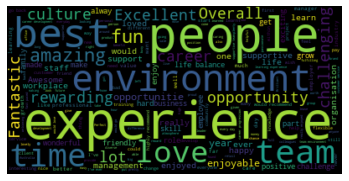

In [131]:
# positive wordcloud
pos = " ".join(title for title in positive["results"])
wordcloud_pos = WordCloud(stopwords=stop_words).generate(pos)

plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

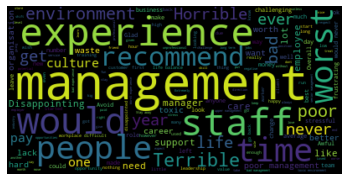

In [132]:
# negative wordcloud
neg = " ".join(title for title in negative["results"])
wordcloud_neg = WordCloud(stopwords=stop_words).generate(neg)

plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Rule-Based Approach: Sentiwordnet

In [133]:
import nltk
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [134]:
# sentiwordnet stores synsets for each word - a collection of all different meanings associated with it
list(swn.senti_synsets("love"))

[SentiSynset('love.n.01'),
 SentiSynset('love.n.02'),
 SentiSynset('beloved.n.01'),
 SentiSynset('love.n.04'),
 SentiSynset('love.n.05'),
 SentiSynset('sexual_love.n.02'),
 SentiSynset('love.v.01'),
 SentiSynset('love.v.02'),
 SentiSynset('love.v.03'),
 SentiSynset('sleep_together.v.01')]

In [135]:
# stopwords 
stop_words = stopwords.words("english")
stop_words.remove("not")

In [136]:
# punctuation
def remove_punct(text):
    for char in string.punctuation:
        text = text.replace(char, "")
    return text

In [137]:
# function that considers all meanings ("synsets") of words
def sentiwordnet_function(text):
    
    text_polarity = 0.0
    num_exceptions = 0
    
    text = text.lower()
    text = contractions.fix(text)
    text = remove_punct(text)
    
    for word in text.split():
        
        if word in stop_words:
            continue
        
        num_meanings = 0
        weight = 0.0
        
        # we take into account the positive and negative scores of each synset, 
        # adding the difference between them to our weight
        try:
            for meaning in list(swn.senti_synsets(word)):
                
                if meaning.pos_score() > meaning.neg_score():
                    weight = weight + (meaning.pos_score() - meaning.neg_score())
                    num_meanings = num_meanings + 1
                
                elif meaning.pos_score() < meaning.neg_score():
                    weight = weight - (meaning.neg_score() - meaning.pos_score())
                    num_meanings = num_meanings + 1
        
        except:
            num_exceptions = num_exceptions + 1
        
        # the overall score for a word is calculated as the average of the weight assigned by all of the synsets
        if num_meanings > 0:
            text_polarity = text_polarity + (weight / num_meanings)
    
    return text_polarity

In [138]:
# example positive text
sentiwordnet_function("I love this coffee shop!")

0.21875

In [139]:
# example negative text
sentiwordnet_function("I hate this coffee shop!")

-0.75

In [140]:
# applying the sentiwordnet_function() to the titles in our dataframe and storing the results in a new column
sentiment_df["swn_polarity"] = sentiment_df["results"].apply(sentiwordnet_function)

In [141]:
# add a new column storing sentiwordnet polarity converted to +1 (positive) or -1 (negative)
sentiment_df["swn_converted"] = sentiment_df["swn_polarity"].apply(lambda sent: +1 if sent > 0 else -1)

In [142]:
sentiment_df.sample(5)

,index,match,results,stars,sentiment,swn_polarity,swn_converted
46968,2370,15,Would absolutely love to work their again.,4,1,1.072917,1
24739,1239,18,Executives are killing the culture.,2,-1,0.520833,1
49882,2530,4,Overall a good experience with nice people.,4,1,0.988043,1
32776,1642,18,Challenging but rewarding.,4,1,0.458333,1
31493,1578,13,That was the great days spent.,4,1,0.906250,1


In [143]:
# number correctly identified
swn_correct = len(sentiment_df[sentiment_df["sentiment"] == sentiment_df["swn_converted"]])
swn_correct

35096

In [144]:
# percentage correctly identified
swn_correct_percentage = round(swn_correct / len(sentiment_df) * 100, 2)
swn_correct_percentage

76.8

Not bad! Can we beat this accuracy with a machine learning approach?

#### ML-Approach: Naive Bayes

In [145]:
# features and labels
features = sentiment_df["results"].apply(lambda x: contractions.fix(x)) # expand contractions
labels = sentiment_df["sentiment"]

In [146]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [147]:
# create bag of words using count vectoriser and regex tokeniser
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r"[a-zA-Z0-9]+")
cv = CountVectorizer(stop_words=stop_words, tokenizer=token.tokenize)

x_train_matrix = cv.fit_transform(x_train)
x_test_matrix = cv.transform(x_test)

In [148]:
# naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [149]:
# training the model on our training data
nb.fit(x_train_matrix, y_train)

MultinomialNB()

In [150]:
# making predictions
predictions = nb.predict(x_test_matrix)

In [151]:
# model evaluation - confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions, y_test) 

array([[3549,  534],
       [ 618, 4439]], dtype=int64)

In [152]:
# true negative (pred & true = -1),        false negative (pred = -1 but true = 1)
# false positive (pred = 1 but true = -1), true positive (pred & true = 1)

In [153]:
# model evaluation - classification report
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

          -1       0.85      0.87      0.86      4083
           1       0.89      0.88      0.89      5057

    accuracy                           0.87      9140
   macro avg       0.87      0.87      0.87      9140
weighted avg       0.87      0.87      0.87      9140



In [154]:
# # model evaluation - accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

0.8739606126914661

In [155]:
# comparing actual and prediction in a dataframe
eval_df = pd.DataFrame()
eval_df["test_titles"] = x_test
eval_df["true_label"] = y_test
eval_df["nb_prediction"] = predictions

In [156]:
eval_df.sample(5)

,test_titles,true_label,nb_prediction
3181,Only just started but already feel right at ho...,1,1
50089,AMAZING WORKPLACE!.,1,1
37020,Frustrating.,-1,-1
1078,I felt like a burden.,-1,1
17800,"I enjoyed my time here, but management do not ...",-1,-1


In [157]:
# number correctly identified
nb_correct = len(eval_df[eval_df["nb_prediction"] == eval_df["true_label"]])
nb_correct

7988

In [158]:
# percentage correctly identified
nb_correct_percentage = round(nb_correct / len(eval_df) * 100, 2)
nb_correct_percentage

87.4

In [159]:
# examples of incorrectly classified titles
eval_df[eval_df["nb_prediction"] != eval_df["true_label"]].sample(5)

,test_titles,true_label,nb_prediction
20737,The Gratitude I have for having a workspace li...,1,-1
15693,Project Engineer .,-1,1
43439,It is not going to work when it is your passio...,1,-1
25785,L thing its a nice come but adjustments are ne...,-1,1
39519,"OK place to work, if you like cricket.",-1,1


That's pretty good! Let's briefly try another classifier.

#### Logistic Regression

In [160]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)

In [161]:
# train
lr.fit(x_train_matrix, y_train)

LogisticRegression(max_iter=200)

In [162]:
# predict
lr_predictions = lr.predict(x_test_matrix)

In [163]:
# confusion matrix
confusion_matrix(lr_predictions, y_test) 

array([[3565,  490],
       [ 602, 4483]], dtype=int64)

In [164]:
# classification report
print(classification_report(lr_predictions, y_test))

              precision    recall  f1-score   support

          -1       0.86      0.88      0.87      4055
           1       0.90      0.88      0.89      5085

    accuracy                           0.88      9140
   macro avg       0.88      0.88      0.88      9140
weighted avg       0.88      0.88      0.88      9140



In [165]:
# accuracy score
accuracy_score(lr_predictions, y_test)

0.8805251641137856

In [166]:
# adding lr predictions to eval_df
eval_df["lr_prediction"] = lr_predictions

In [167]:
eval_df.sample(5)

,test_titles,true_label,nb_prediction,lr_prediction
19878,Poor.,-1,-1,-1
26429,The last 10 weeks of my employment was ghastly.,-1,-1,-1
48947,An eye opener of corporate under staff environ...,-1,-1,-1
37571,I had fun while working with the company.,1,1,1
37595,Great company to work for.,1,1,1


In [168]:
# number correctly identified
lr_correct = len(eval_df[eval_df["lr_prediction"] == eval_df["true_label"]])
lr_correct

8048

In [169]:
# percentage correctly identified
lr_correct_percentage = round(lr_correct / len(eval_df) * 100, 2)
lr_correct_percentage

88.05

#### Testing with New Titles

In [170]:
new_title_1 = "The pay was average and the hours too long."
print("Sentiwordnet Prediction: ", round(sentiwordnet_function(new_title_1), 2),
                                   [+1 if sentiwordnet_function(new_title_1) > 0 else -1])
print("Naive Bayes Prediction: ", nb.predict(cv.transform([new_title_1])))
print("Logistic Regression Prediction: ", lr.predict(cv.transform([new_title_1])))

Sentiwordnet Prediction:  -0.62 [-1]
Naive Bayes Prediction:  [-1]
Logistic Regression Prediction:  [-1]


In [171]:
new_title_2 = "Management was helpful and there was a lot of opportunity for career progression."
print("Sentiwordnet Prediction: ", round(sentiwordnet_function(new_title_2), 2),
                                   [+1 if sentiwordnet_function(new_title_2) > 0 else -1])
print("Naive Bayes Prediction: " , nb.predict(cv.transform([new_title_2])))
print("Logistic Regression Prediction: " , lr.predict(cv.transform([new_title_2])))

Sentiwordnet Prediction:  0.38 [1]
Naive Bayes Prediction:  [1]
Logistic Regression Prediction:  [1]


In [172]:
new_title_3 = "I loved the team but hated the day-to-day tasks."
print("Sentiwordnet Prediction: ", round(sentiwordnet_function(new_title_3), 2), 
                                   [+1 if sentiwordnet_function(new_title_3) > 0 else -1])
print("Naive Bayes Prediction: " , nb.predict(cv.transform([new_title_3])))
print("Logistic Regression Prediction: " , lr.predict(cv.transform([new_title_3])))

Sentiwordnet Prediction:  -0.18 [-1]
Naive Bayes Prediction:  [1]
Logistic Regression Prediction:  [1]


In [173]:
new_title_4 = "I hated the day-to-day tasks but loved the team."
print("Sentiwordnet Prediction: ", round(sentiwordnet_function(new_title_4), 2),
                                   [+1 if sentiwordnet_function(new_title_4) > 0 else -1])
print("Naive Bayes Prediction: " , nb.predict(cv.transform([new_title_4])))
print("Logistic Regression Prediction: " , lr.predict(cv.transform([new_title_4])))

Sentiwordnet Prediction:  -0.18 [-1]
Naive Bayes Prediction:  [1]
Logistic Regression Prediction:  [1]
